# Жизненный цикл ML проекта

## Цели работы

1. **Разведочный анализ данных:**
   - Изучение и анализ данных с использованием разведочного анализа. Подключение к базе данных PostgreSQL, выгрузка и сохранение данных в датафрейм.
   
2. **Анализ распределения переменных:**
   - Построение гистограмм распределения для каждой переменной с целью понимания их характеристик и особенностей, а также анализ и описание распределения каждой переменной. Экспериментирование с различным количеством разбивок (bins) для получения более детального представления о распределении данных.
   
3. **Интерпретация результатов:**
   - Определение областей с высокой и низкой концентрацией значений, что позволит выявить важные инсайты и закономерности в данных.

Цели работы направлены на глубокое понимание структуры и особенностей данных через разведочный анализ, что является критически важным этапом в жизненном цикле проектов машинного обучения. Этот этап позволяет определить подходы к последующему моделированию и принятию обоснованных решений на основе данных.


## Этап 1. Разведочный анализ данных

Этот блок кода отвечает за подключение к базе данных и извлечение данных. Вот что происходит в каждом шаге:

1. **Установление соединения с базой данных:**
   - Используя параметры подключения, создается строка соединения с базой данных PostgreSQL, что позволяет получить доступ к таблице `exploratory`.

2. **Извлечение данных:**
   - С помощью SQL запроса `"SELECT * FROM exploratory"` данные извлекаются из таблицы и загружаются в датафрейм `exploratory`. Затем применяется функция `pd.to_numeric` для преобразования всех значений в числовой формат, обеспечивая корректность последующего анализа.

3. **Просмотр начальных строк данных:**
   - Вызывается метод `.head()` для визуального осмотра первых строк данных, что позволяет получить представление о структуре и типе данных.

In [1]:
import numpy as np
import pandas as pd
import psycopg2
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rc("font", size=18) # для увеличения шрифта подписей графиков

In [2]:
connection = f"postgresql://{'readonly'}:{'6hajV34RTQfmxhS'}@{'dsstudents.skillbox.ru'}:{'5432'}/{'db_ds_students'}"
exploratory = pd.read_sql_query("SELECT * FROM exploratory", connection)
exploratory = exploratory.apply(pd.to_numeric, errors='coerce')

In [3]:
exploratory.head()

,feature_1,feature_2,feature_3,feature_4,feature_5
0,2.439930,-2.180961,33.468496,-1.927388,-5.321392
1,1.770580,-1.174880,0.989593,-1.139681,-2.080220
2,0.742817,-0.263483,0.168149,-0.332438,-0.195720
3,-1.510892,2.712571,-2.685643,2.058495,-4.098402
4,-0.483511,0.096511,-0.028703,0.168763,-0.046664


## Этап 2. Анализ распределения переменных

Этот блок кода представляет собой визуализацию распределений пяти переменных (`feature_1` до `feature_5`) с помощью гистограмм и диаграмм размаха (box plots). Диаграммы размаха полезны для отображения медиан, квартилей, а также потенциальных выбросов в данных. Вот что происходит на каждом этапе:

1. **Визуализация распределения каждой переменной:**
   - Для каждой переменной (`feature_1` до `feature_5`) строится гистограмма распределения с помощью метода `.hist`. Это визуальное представление позволяет оценить распределение значений, выявить моды, асимметрию, аномалии и другие характеристики данных. 

1. **Визуализация размаха для каждой переменной:**
   - Для каждой переменной (`feature_1` до `feature_5`) строится визуализация диаграммы размаха . Это позволяет оценить распределение, медиану, квартили и потенциальные выбросы.

Использование диаграмм размаха в этом блоке кода предоставляет ценную информацию о распределении каждой из переменных, ключевых статистических метриках и потенциальных выбросах, что является важным аспектом анализа распределения.



**Колонка "feature_1":**

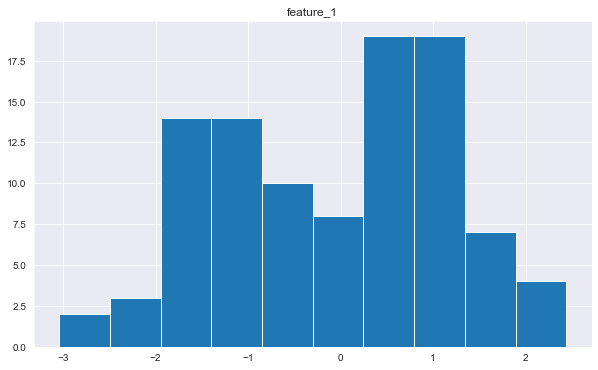

In [4]:
exploratory.hist(column = 'feature_1', bins=10, figsize=(10, 6))
plt.show()

На графике видно 2 разброса — от **-2 до -0,5** и от **0,5 до 1,5**. Больше всего значений находится во втором промежутке — от **0,5 до 1,5**.

Меньше всего значений видно по краям графика от **-3 до -2**, от **1,5 до 2**, а также в середине — от **-0,5 до 0,5**.

**Колонка “feature_2”:**

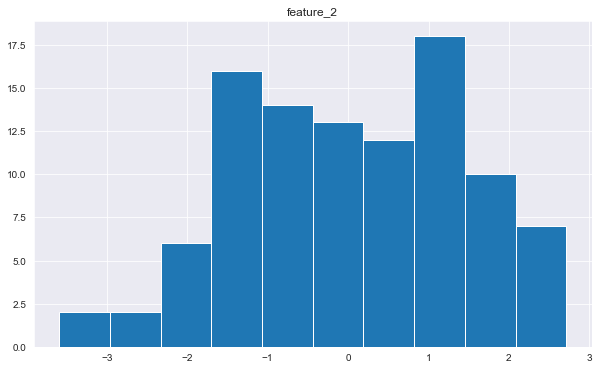

In [5]:
exploratory.hist(column = 'feature_2', bins=10, figsize=(10, 6))
plt.show()

На графике видно 2 пика — от **-1,5 до -1** и от **1 до 1,5**. Значения от **1 до 1,5** похожи на выброс, так как после пика в -1,5 значения плавно падают до 3, исключая этот промежуток.

Меньше всего значений видно в начале графика от **-4 до -2**.

**Колонка "feature_3":**

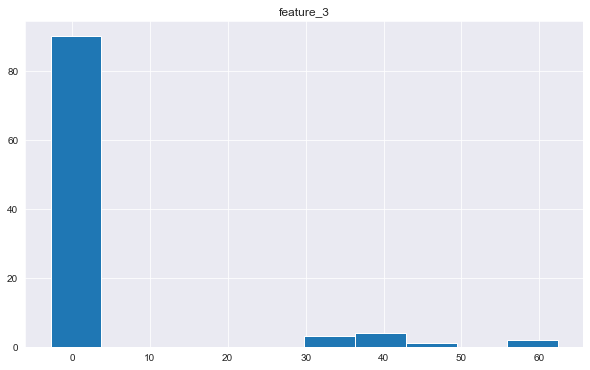

In [6]:
exploratory.hist(column = 'feature_3', bins=10, figsize=(10, 6))
plt.show()

Почти все значения приходятся на промежуток от **-5 до 5**. Остальные значения несущественны — они находятся в промежутке от **30 до 65**.

**Колонка "feature_4":**

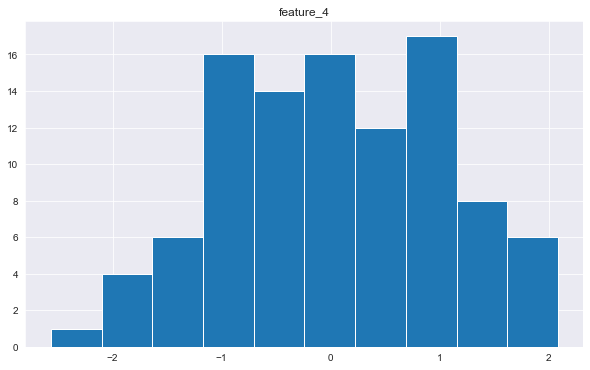

In [18]:
exploratory.hist(column = 'feature_4', bins=10, figsize=(10, 6))
plt.show()

Распределение значений похоже на нормальное — с пиком посередине и с минимальными значениями по краям. Пик приходится на промежутки от **-1 до 1**. Минимальные значения же находятся в промежутках от **-2,5 до -1** и от **1 до 2**.

**Колонка “feature_5”:**

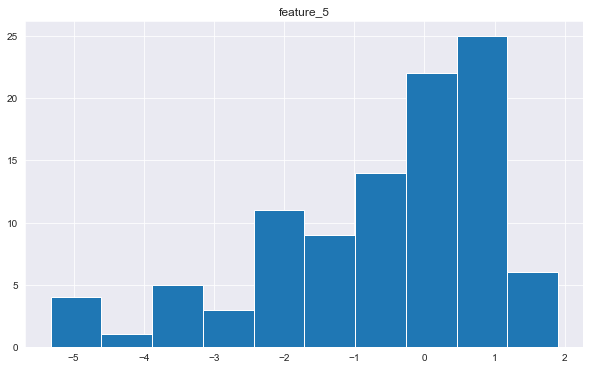

In [8]:
exploratory.hist(column = 'feature_5', bins=10, figsize=(10, 6))
plt.show()

Значения графика растут равномерно почти на всём интервале от **-5 до 1**, но резко падает в промежутке от **1 до 2**. Самый пик значений приходится на промежуток от **0,5 до 1**, а самое минимальное значение приходится на отрезок от **-4,5 до -4**.

**Feature_1:**

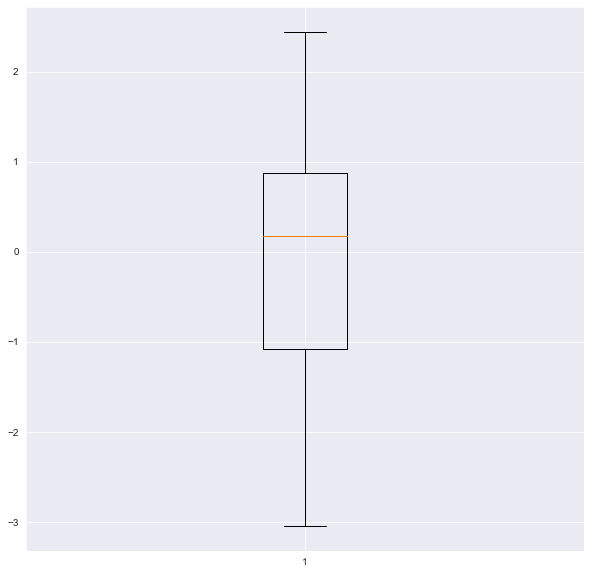

In [9]:
plt.figure(figsize=(10, 10))
plt.boxplot(exploratory['feature_1']);

Выбросов на графике нет. Верхняя граница значений — примерно 2.5, нижняя – -3. Верхний квартиль ~0.9, нижний – ~-1. Медиана находится на уровне примерно 0.2.

**Feature_2:**

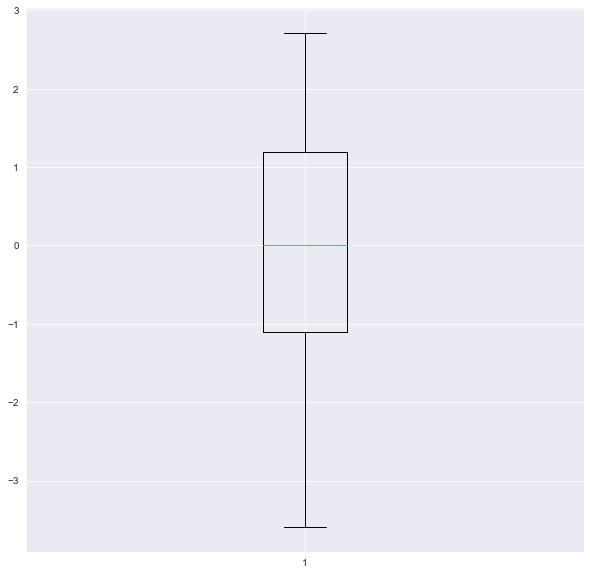

In [10]:
plt.figure(figsize=(10, 10))
plt.boxplot(exploratory['feature_2']);

Выбросов также нет. Медиана — 0, нижний квартиль — приблизительно -1.1, верхний — ~1.2, верхняя граница — ~2.7, нижняя – ~-3.7.

**Feature_3:**

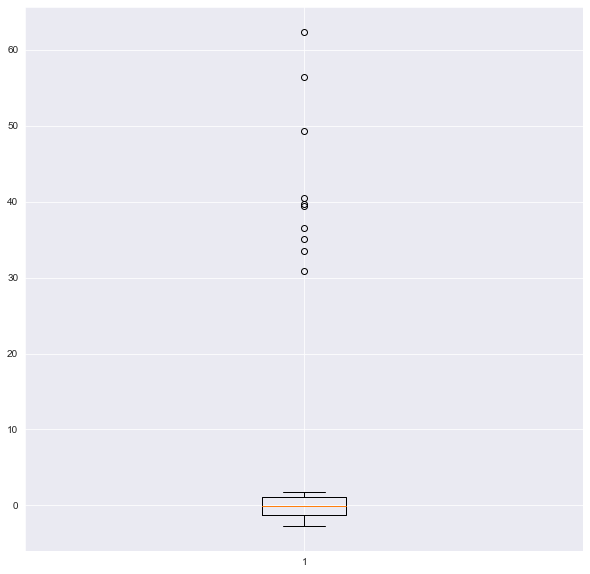

In [11]:
plt.figure(figsize=(10, 10))
plt.boxplot(exploratory['feature_3']);

На графике можно видеть множество выбросов, как мы и предполагали. Они находятся сверху графика приблизительно на промежутках от 30 до 63. Медиана находится примерно на значении 0, нижняя граница примерно -5, верхняя – 3. Квартили находятся близко к границам. Нижний -2, верхний 2. Для более точного описания нужно чистить данные.

**Feature_4:**

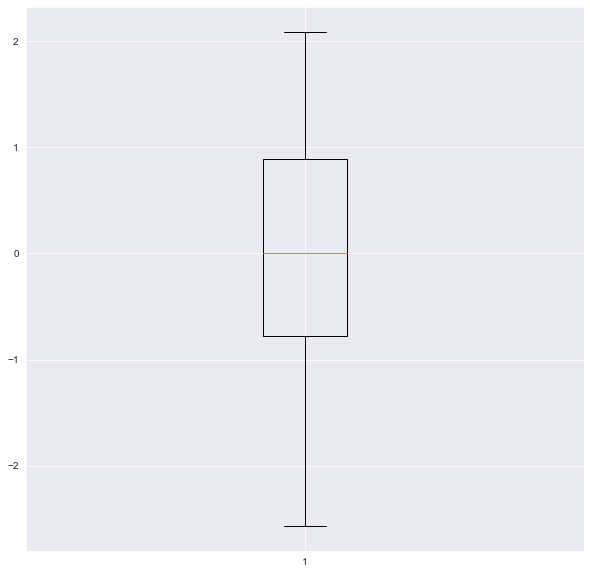

In [12]:
plt.figure(figsize=(10, 10))
plt.boxplot(exploratory['feature_4']);

Выбросов на графике нет. Медиана – 0. Нижняя граница ~-2.7, нижний квартиль ~-0.7, верхний квартиль ~0.9, верхняя граница ~2.1.

**Feature_5:**

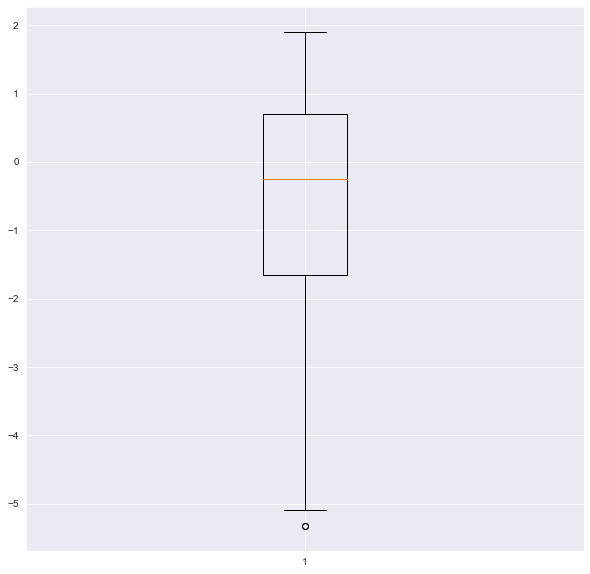

In [13]:
plt.figure(figsize=(10, 10))
plt.boxplot(exploratory['feature_5']);

Есть один выброс на уровне ~-5.3. Нижняя граница ~-5, нижний квартиль ~-1.7, медиана ~-0.2, верхний квартиль ~0.8, верхняя граница ~2.

## Этап 3. Интерпритация данных

Этот блок кода иллюстрирует взаимосвязи между переменными путем создания диаграмм рассеяния. В каждой диаграмме анализируется взаимодействие между `feature_4` и другими переменными (`feature_1`, `feature_2`, `feature_3`, `feature_5`). Диаграммы рассеяния полезны для визуализации и понимания взаимосвязей между парами переменных. Вот детальное описание каждого шага:

1. **Взаимосвязь между `feature_1` и `feature_4`:**
   - Создается диаграмма рассеяния, где по оси x отложена `feature_1`, а по оси y – `feature_4`. Это позволяет визуально оценить, как переменные связаны друг с другом, выявить возможные закономерности или аномалии в данных.

2. **Взаимосвязь между `feature_2` и `feature_4`:**
   - Аналогично, строится диаграмма рассеяния для `feature_2` и `feature_4`. Визуализация помогает понять, существует ли корреляция между этими переменными и как они могут влиять друг на друга.

3. **Взаимосвязь между `feature_3` и `feature_4`:**
   - Диаграмма рассеяния для `feature_3` и `feature_4` строится для анализа их взаимодействия. Особое внимание уделяется определению тенденций или кластеров в распределении точек.

4. **Взаимосвязь между `feature_5` и `feature_4`:**
   - В конце, строится диаграмма рассеяния для `feature_5` и `feature_4`. Это позволяет оценить, как эти две переменные связаны и как распределение одной переменной может быть связано с распределением другой.


**Проверка влияния переменной feature_1 на feature_4:**

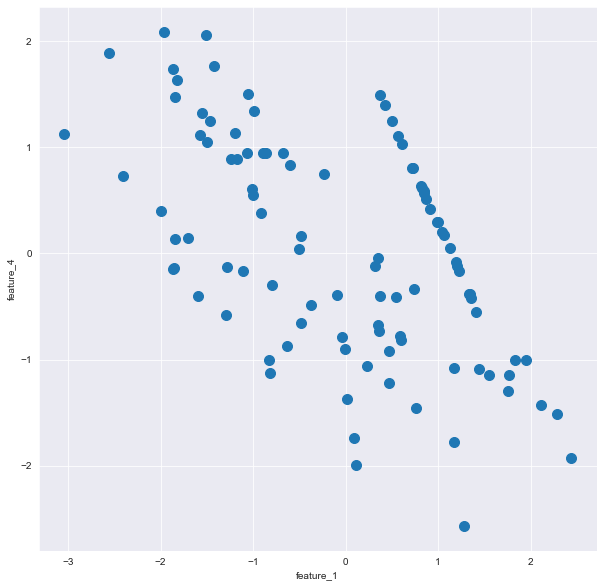

In [14]:
# f1
fig = plt.figure(figsize=(10, 10)) # создаем картинку
ax = plt.axes()
plt.xlabel('feature_1')
plt.ylabel('feature_4')

ax.scatter(exploratory["feature_1"], exploratory["feature_4"], s=100)

plt.show()

Проверка влияния переменной feature_2 на feature_4:

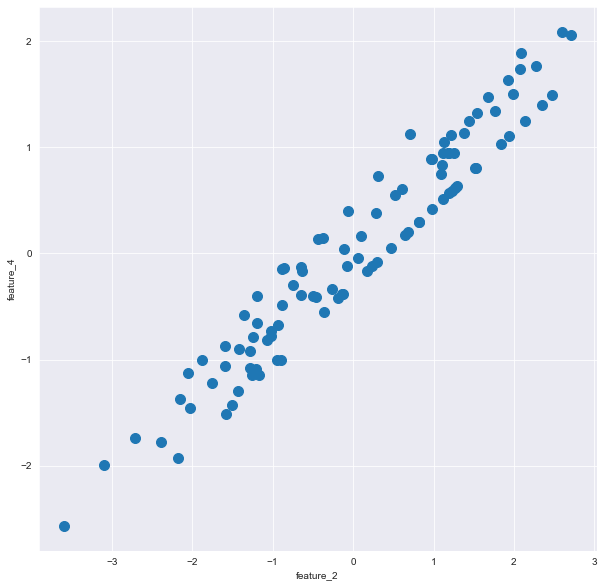

In [15]:
# f2
fig = plt.figure(figsize=(10, 10)) # создаем картинку
ax = plt.axes()
plt.xlabel('feature_2')
plt.ylabel('feature_4')

ax.scatter(exploratory["feature_2"], exploratory["feature_4"], s=100)

plt.show()

Проверка влияния переменной feature_3 на feature_4:

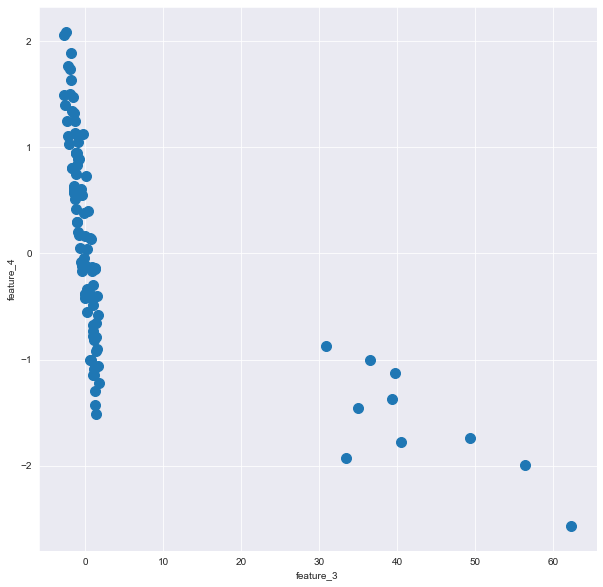

In [16]:
# f3
fig = plt.figure(figsize=(10, 10)) # создаем картинку
ax = plt.axes()
plt.xlabel('feature_3')
plt.ylabel('feature_4')

ax.scatter(exploratory["feature_3"], exploratory["feature_4"], s=100)

plt.show()

Проверка влияния переменной feature_5 на feature_4:

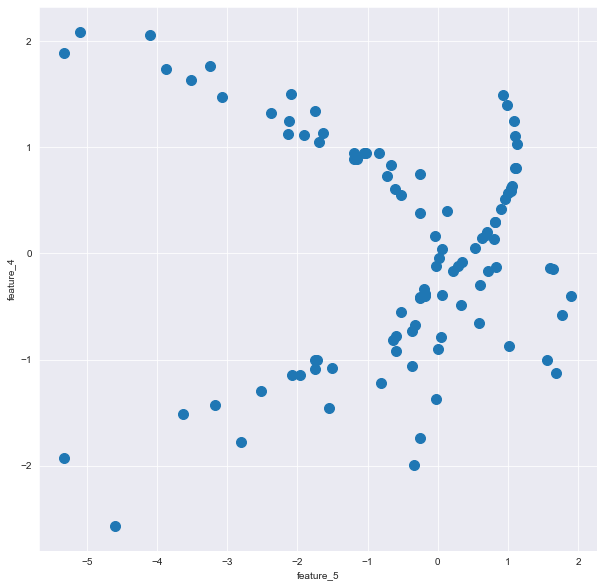

In [17]:
# f5
fig = plt.figure(figsize=(10, 10)) # создаем картинку
ax = plt.axes()
plt.xlabel('feature_5')
plt.ylabel('feature_4')

ax.scatter(exploratory["feature_5"], exploratory["feature_4"], s=100)

plt.show()

Судя по графику, явную линейную зависимость на feature_4 может оказывать feature_2. Также можно рассмотреть включение переменных feature_1 и, если почистить данные, feature_3. У них зависимость не такая явная, но может присутствовать.